## This is my sandbox for testing out code and training the model to get the best vibe

I've manually created data.json and put all the presets I like best in it.
The best_frames.json is created by the script and is hopefully filled with good presets for the best frames.

In [96]:
# Train a basic model on the imported dataset 'data.json'

# Import the required libraries
import pandas as pd
import numpy as np

# Import the dataset
data = pd.read_json('./data.json')

# Print the first 5 rows of the dataset
data.head()


,rating,params
0,5,"{'a': 22.59729293069504, 'b': 0.63801649627541..."
1,2,"{'a': 28.404283661379537, 'b': 1.4576280020089..."
2,7,"{'a': -28.551287483228023, 'b': 0.224036261263..."
3,3,"{'a': 27.329004508348106, 'b': 1.0709376492897..."
4,0,"{'a': -14.787510394833287, 'b': 0.383476663239..."


In [97]:
# Restructure data so that the params are in a single column

# Create the dataframe from the params column and extract the internal dict to a new dataframe
X = pd.DataFrame(data, columns=['params'])
X = pd.DataFrame(X.params.values.tolist(), index=X.index).drop(['timeCreated'], axis=1)
# Remove unwanted columns

y = pd.DataFrame(data, columns=['rating'])

In [98]:
# Shuffle and split the dataset into training and testing sets
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=420)

In [100]:
# Train a basic neural network model using Keras
from keras.models import Sequential
from keras.layers import Dense

model = Sequential()
model.add(Dense(12, input_dim=8, activation='relu'))
model.add(Dense(256, activation='relu'))
model.add(Dense(24, activation='relu'))

# Output layer
model.add(Dense(1, activation='linear'))

# Compile the model

model.compile(loss='mean_squared_error', optimizer='adam', metrics=['mean_squared_error'])

# Train the model

history = model.fit(X_train, y_train, epochs=170, batch_size=100, validation_data=(X_test, y_test))

# Predict the rating for the test set

y_pred = model.predict(X_test)

print(np.mean(y_pred))

print(np.mean(y_test))


Epoch 1/170
3/3 [==============================] - 0s 71ms/step - loss: 27.7814 - mean_squared_error: 27.7814 - val_loss: 20.6501 - val_mean_squared_error: 20.6501
Epoch 2/170
3/3 [==============================] - 0s 23ms/step - loss: 18.0143 - mean_squared_error: 18.0143 - val_loss: 14.6891 - val_mean_squared_error: 14.6891
Epoch 3/170
3/3 [==============================] - 0s 21ms/step - loss: 12.8034 - mean_squared_error: 12.8034 - val_loss: 11.3803 - val_mean_squared_error: 11.3803
Epoch 4/170
3/3 [==============================] - 0s 24ms/step - loss: 10.7003 - mean_squared_error: 10.7003 - val_loss: 10.9195 - val_mean_squared_error: 10.9195
Epoch 5/170
3/3 [==============================] - 0s 23ms/step - loss: 11.5854 - mean_squared_error: 11.5854 - val_loss: 11.4089 - val_mean_squared_error: 11.4089
Epoch 6/170
3/3 [==============================] - 0s 21ms/step - loss: 12.1243 - mean_squared_error: 12.1243 - val_loss: 11.0068 - val_mean_squared_error: 11.0068
Epoch 7/170
3/3 

c:\Users\mlg\AppData\Local\Programs\Python\Python39\lib\site-packages\numpy\core\fromnumeric.py:3430: FutureWarning: In a future version, DataFrame.mean(axis=None) will return a scalar mean over the entire DataFrame. To retain the old behavior, use 'frame.mean(axis=0)' or just 'frame.mean()'
  return mean(axis=axis, dtype=dtype, out=out, **kwargs)


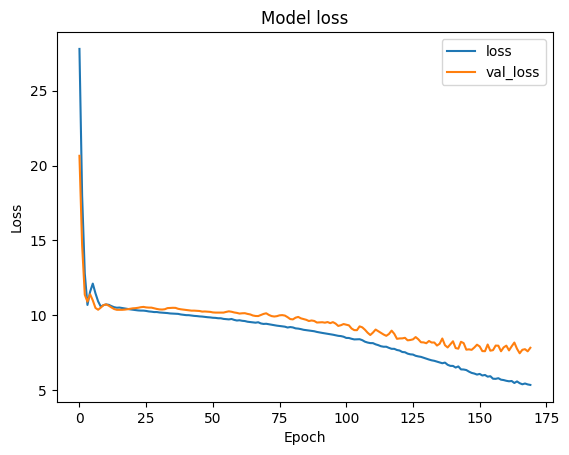

In [101]:
# Plot the loss and accuracy for the model

import matplotlib.pyplot as plt

plt.plot(history.history['loss'], label='loss')
# Plot the valodation accuracy
plt.plot(history.history['val_loss'], label='val_loss')
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')

plt.legend()
plt.show()


In [102]:
# use the model to predict the rating for the test set

y_pred = model.predict(X_test)

# Test the accuracy of the prediction

from sklearn.metrics import mean_squared_error

print("NN: {}".format(mean_squared_error(y_test, y_pred)))




2/2 [==============================] - 0s 3ms/step
NN: 7.8427044544081665
KNN: 10.944375


In [103]:
# Export the model to a file

model.save('model.h5')

In [111]:
# Generating the best frames for the orbit visualizer

# Randomly generate 1000 frames, get the model to classify them and save the best 100 frames

import random

# Generate 10000 random frames within the ranges of the various parameters
frames = []
for i in range(10000):
		frame = []
		frame.append(random.uniform(-30, 30)) # a
		frame.append(random.uniform(0.2, 1.8)) # b
		frame.append(random.uniform(5, 17)) # c
		frame.append(random.uniform(0, 10)) # d
		frame.append(random.uniform(0, 12)) # e
		frame.append(random.uniform(0, 1)) # choice
		frame.append(random.uniform(0, 1)) # xPreset
		frame.append(random.uniform(0, 1)) # yPreset
		frames.append(frame)

# Get the model to classify the frames
frames = np.array(frames)

# Get the model to predict the rating for the frames
frames_pred = model.predict(frames)

# Get the best 100 frames
best_frames = []
for i in range(200):
		argMax = np.argmax(frames_pred)
		best_frames.append({"pred": argMax, "params": frames[argMax]})
		frames_pred[argMax] = -1


print(best_frames)

313/313 [==============================] - 1s 4ms/step
[{'pred': 3422, 'params': array([-26.53085802,   0.62417455,  13.76843436,   1.63494559,
         0.04945693,   0.96284039,   0.90866009,   0.76604272])}, {'pred': 6009, 'params': array([-10.01284788,   0.36742072,  16.6938615 ,   0.32575267,
         3.11524838,   0.92314277,   0.11632177,   0.99820485])}, {'pred': 385, 'params': array([-24.7850789 ,   0.3831935 ,  15.04480158,   2.28407603,
         2.75094857,   0.82513441,   0.53908316,   0.59445728])}, {'pred': 7245, 'params': array([-19.39032551,   0.28201416,  15.46208445,   0.44061069,
         0.06888747,   0.81777189,   0.58451218,   0.85366491])}, {'pred': 5107, 'params': array([-2.95634348e+01,  4.29591184e-01,  7.32838665e+00,  9.49291201e+00,
        6.12606659e-03,  9.46077179e-01,  8.18139192e-01,  2.02980155e-01])}, {'pred': 2502, 'params': array([-24.48627218,   0.42294672,  15.6271141 ,   1.91231696,
         1.02784175,   0.69121473,   0.26370474,   0.31231276])

In [113]:
# Map the best frames to the parameters
mapped = []
for frame in best_frames:
		mapped.append({"rating": str(frame['pred']), "params": {
				"a": frame['params'][0],
				"b": frame['params'][1],
				"c": frame['params'][2],
				"d": frame['params'][3],
				"e": frame['params'][4],
				"choice": frame['params'][5],
				"xPreset": frame['params'][6],
				"yPreset": frame['params'][7],
				
		}})

# Convert the best frames to JSON and save them to a file
import json

with open('best_frames.json', 'w') as outfile:
		json.dump(mapped, outfile)